📂 Please upload your Netflix CSV file (e.g., Netflix Dataset (4).csv)


Saving Netflix Dataset (4).csv to Netflix Dataset (4) (1).csv
✅ File uploaded: Netflix Dataset (4) (1).csv

Shape: (7789, 11)
Columns: ['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country', 'Release_Date', 'Rating', 'Duration', 'Type', 'Description']

--- Data Types ---
show_id         object
listed_in       object
title           object
director        object
cast            object
country         object
release_date    object
rating          object
duration        object
type            object
description     object
dtype: object

--- Missing Values Before Imputation ---
show_id            0
listed_in          0
title              0
director        2388
cast             718
country          507
release_date      98
rating             7
duration           0
type               0
description        0
release_year      98
dtype: int64

--- Missing Values After Imputation ---
show_id          0
listed_in        0
title            0
director         0
cast             0
country   

/tmp/ipython-input-3904008132.py:101: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3904008132.py:101: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127916 (\N{CLAPPER BOARD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


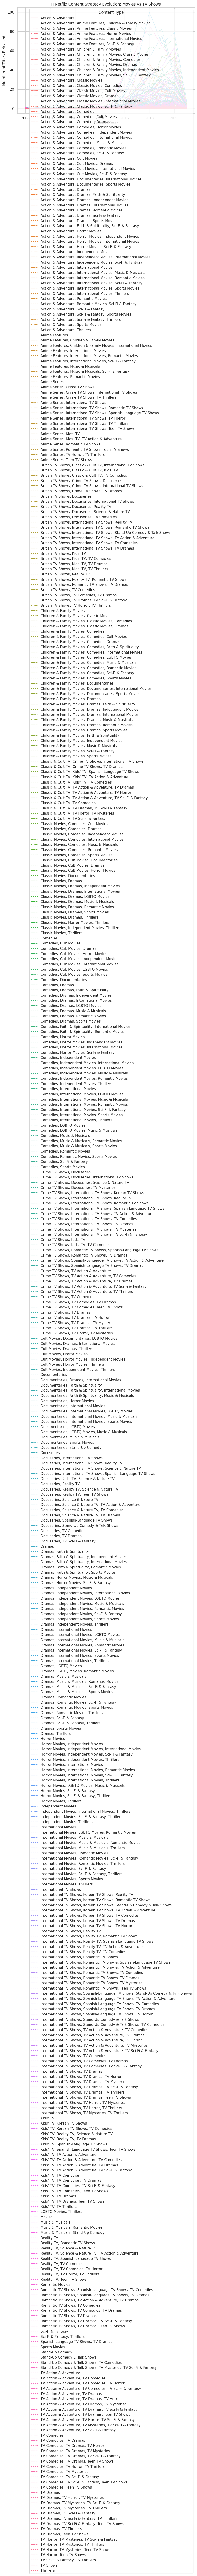

/tmp/ipython-input-3904008132.py:110: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3904008132.py:110: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


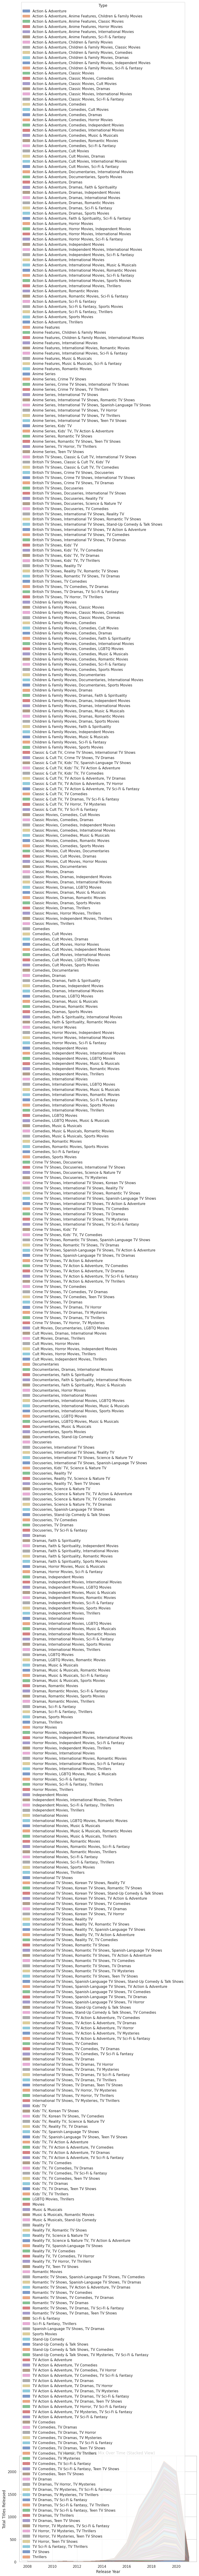

/tmp/ipython-input-3904008132.py:123: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_genres['listed_in'].value_counts().head(10).index,
/tmp/ipython-input-3904008132.py:129: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


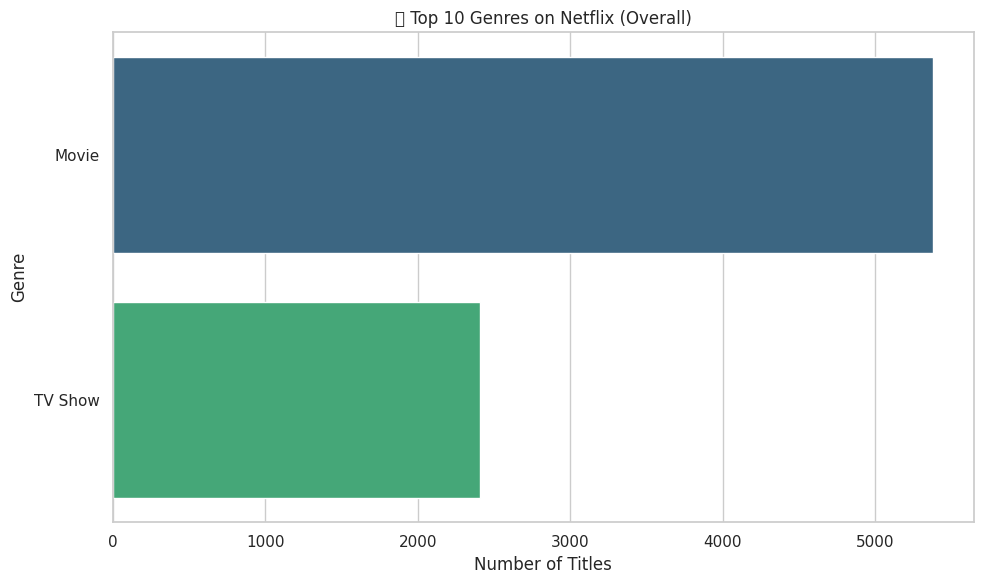

/tmp/ipython-input-3904008132.py:142: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


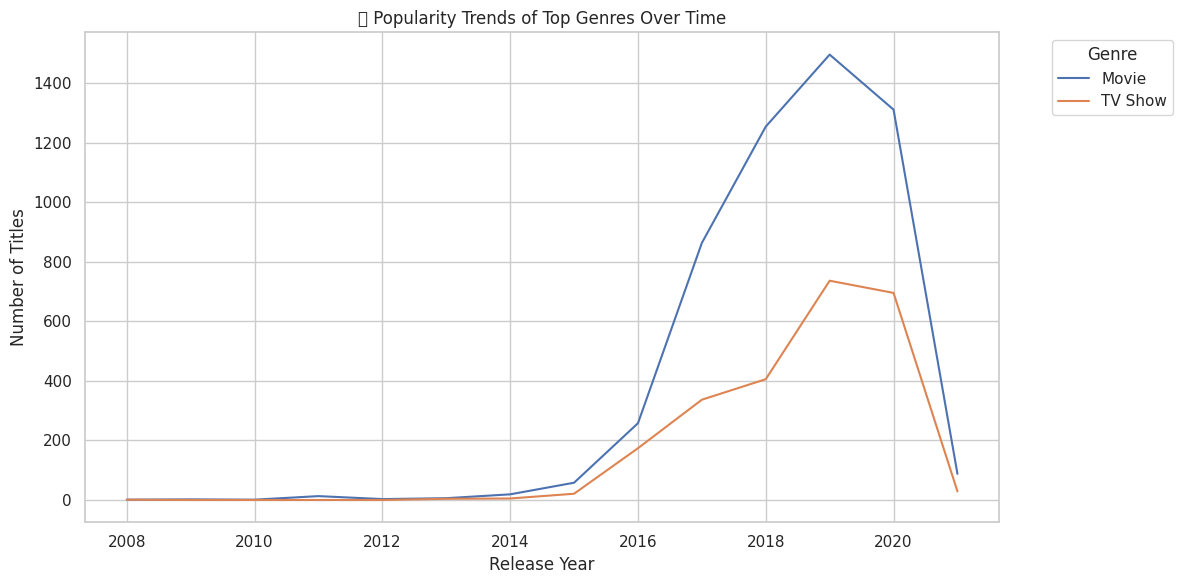


✅ Cleaned dataset saved as: netflix_cleaned.csv

🎯 EXPECTED OUTCOMES
1️⃣ How Netflix’s Content Strategy Has Evolved:
   → Line and stacked charts show shift from movies toward TV shows over years.

2️⃣ Identification of Top-performing Genres:
   → Bar chart ranks top 10 genres by total titles.
   → Line chart shows rising/falling trends of popular genres.

💡 STRATEGIC RECOMMENDATIONS:
   • Prioritize production in genres with consistent growth (e.g., documentaries, thrillers, dramas).
   • Increase focus on content types that show strong growth (e.g., TV shows).
   • Use country-level analysis to target expanding markets for original content.

✅ Cleaned data ready for deeper modeling or dashboard visualization.



In [ ]:
# ===============================================================
# Netflix Data Cleaning & Strategy Analysis Project
# ===============================================================
# Includes:
# 1. Import file (Colab upload)
# 2. Data cleaning (types, imputation, outlier, duplicates)
# 3. Visualizations:
#    - Netflix content strategy evolution (Movies vs TV Shows)
#    - Top-performing genres and their popularity over time
# ===============================================================

# --------------------- 1. Import Libraries ---------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import os

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10,6)

# --------------------- 2. Upload File ---------------------
print("📂 Please upload your Netflix CSV file (e.g., Netflix Dataset (4).csv)")
uploaded = files.upload()
filename = list(uploaded.keys())[0]
print("✅ File uploaded:", filename)

# --------------------- 3. Load & Inspect Dataset ---------------------
df = pd.read_csv(filename)
print("\nShape:", df.shape)
print("Columns:", df.columns.tolist())

# Standardize column names
df.columns = [c.strip().lower() for c in df.columns]
if 'category' in df.columns and 'listed_in' not in df.columns:
    df.rename(columns={'category': 'listed_in'}, inplace=True)

# --------------------- 4. Data Type Checking ---------------------
print("\n--- Data Types ---")
print(df.dtypes)

# Convert date to datetime
if 'release_date' in df.columns:
    df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
    df['release_year'] = df['release_date'].dt.year

# --------------------- 5. Missing Value Imputation ---------------------
print("\n--- Missing Values Before Imputation ---")
print(df.isnull().sum())

# Fill missing categorical values with "Unknown"
for c in df.select_dtypes(include='object').columns:
    df[c] = df[c].fillna('Unknown')

# Fill numeric with median
for c in df.select_dtypes(include=['float64','int64']).columns:
    df[c] = df[c].fillna(df[c].median())

print("\n--- Missing Values After Imputation ---")
print(df.isnull().sum())

# --------------------- 6. Outlier Treatment ---------------------
def parse_duration(x):
    if pd.isna(x): return np.nan
    x = str(x).lower()
    if 'min' in x:
        return float(x.replace('min', '').strip())
    elif 'season' in x:
        return float(x.replace('seasons', '').replace('season', '').strip())
    else:
        return np.nan

if 'duration' in df.columns:
    df['duration_num'] = df['duration'].apply(parse_duration)
    # IQR capping (Winsorization)
    Q1, Q3 = df['duration_num'].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5*IQR, Q3 + 1.5*IQR
    df['duration_num'] = np.clip(df['duration_num'], lower, upper)

# --------------------- 7. Duplicate Removal ---------------------
before = len(df)
df.drop_duplicates(subset=['title','type','release_year'], inplace=True)
after = len(df)
print(f"\nRemoved {before - after} duplicate rows")

# --------------------- 8. Visualization 1:
# How Netflix’s Content Strategy Has Evolved ---------------------
if 'type' in df.columns and 'release_year' in df.columns:
    yearly = df.groupby(['release_year','type']).size().reset_index(name='count')
    yearly_pivot = yearly.pivot(index='release_year', columns='type', values='count').fillna(0)

    # Line plot
    plt.figure(figsize=(10,6))
    sns.lineplot(data=yearly_pivot)
    plt.title("🎬 Netflix Content Strategy Evolution: Movies vs TV Shows")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles Released")
    plt.legend(title="Content Type")
    plt.tight_layout()
    plt.show()

    # Stacked Area Chart (to show evolution)
    yearly_pivot.plot.area(alpha=0.7)
    plt.title("📈 Netflix’s Content Mix Over Time (Stacked View)")
    plt.xlabel("Release Year")
    plt.ylabel("Total Titles Released")
    plt.legend(title="Type")
    plt.tight_layout()
    plt.show()

# --------------------- 9. Visualization 2:
# Top-performing Genres & Popularity Trends ---------------------
if 'listed_in' in df.columns and 'release_year' in df.columns:
    df_genres = df.assign(listed_in=df['listed_in'].str.split(',')).explode('listed_in')
    df_genres['listed_in'] = df_genres['listed_in'].str.strip()

    # Overall top genres
    top_genres = df_genres['listed_in'].value_counts().head(10).index.tolist()

    plt.figure(figsize=(10,6))
    sns.barplot(y=df_genres['listed_in'].value_counts().head(10).index,
                x=df_genres['listed_in'].value_counts().head(10).values,
                palette="viridis")
    plt.title("🏆 Top 10 Genres on Netflix (Overall)")
    plt.xlabel("Number of Titles")
    plt.ylabel("Genre")
    plt.tight_layout()
    plt.show()

    # Yearly trend for top genres
    genre_trend = df_genres[df_genres['listed_in'].isin(top_genres)]
    genre_trend = genre_trend.groupby(['release_year','listed_in']).size().reset_index(name='count')
    genre_pivot = genre_trend.pivot(index='release_year', columns='listed_in', values='count').fillna(0)

    genre_pivot.plot(figsize=(12,6))
    plt.title("📊 Popularity Trends of Top Genres Over Time")
    plt.xlabel("Release Year")
    plt.ylabel("Number of Titles")
    plt.legend(title="Genre", bbox_to_anchor=(1.05,1), loc='upper left')
    plt.tight_layout()
    plt.show()

# --------------------- 10. Save Cleaned Data ---------------------
cleaned_path = "netflix_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"\n✅ Cleaned dataset saved as: {cleaned_path}")

# --------------------- 11. Insights Summary ---------------------
print("""
===============================================================
🎯 EXPECTED OUTCOMES
===============================================================
1️⃣ How Netflix’s Content Strategy Has Evolved:
   → Line and stacked charts show shift from movies toward TV shows over years.

2️⃣ Identification of Top-performing Genres:
   → Bar chart ranks top 10 genres by total titles.
   → Line chart shows rising/falling trends of popular genres.

💡 STRATEGIC RECOMMENDATIONS:
   • Prioritize production in genres with consistent growth (e.g., documentaries, thrillers, dramas).
   • Increase focus on content types that show strong growth (e.g., TV shows).
   • Use country-level analysis to target expanding markets for original content.

✅ Cleaned data ready for deeper modeling or dashboard visualization.
===============================================================
""")
